Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import plotly.io as pio
pio.renderers
pio.renderers.default = "browser"

import Preprocess as pp
import Viz as viz

np.set_printoptions(precision = 3)

Set defaults

In [14]:
RANDOM_STATE = 42

df, column_trans, idx, df_orig = pp.preprocessData()

X = df_orig.drop(columns=['land_sale_price', 'deed_date', 'total_sale_price'])
y = df_orig['total_sale_price']

In [15]:
le = LabelEncoder()

X['physical_zip_code'] = le.fit_transform(X['physical_zip_code'].astype(str))
X['physical_city'] = le.fit_transform(X['physical_city'].astype(str))

ss = StandardScaler()

X = pd.DataFrame(ss.fit_transform(X), columns = X.columns.to_list())


# K-Means Clustering

## Elbow Method

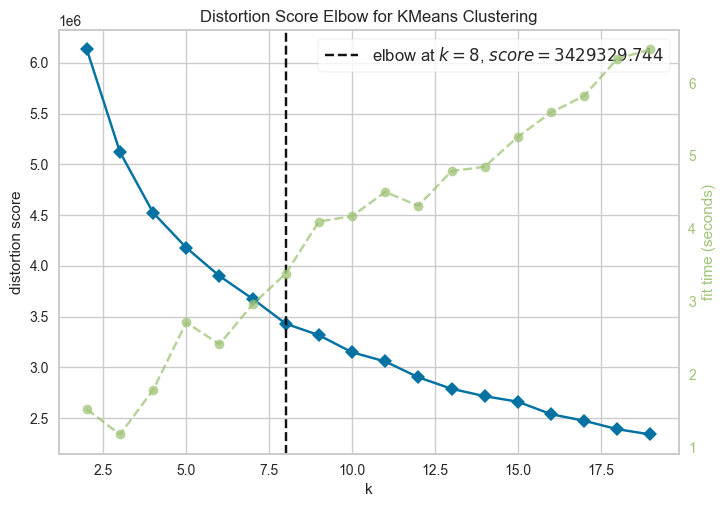

In [7]:
# initiate kmeans instance
kmeans = KMeans(init='k-means++', random_state=RANDOM_STATE)
k_start = 2
k_end = 20

# show results for full dataset
elb_visualizer = KElbowVisualizer(kmeans, k=(k_start, k_end)).fit(X).show()  

## Clustering Scores

c:\Users\choit\OneDrive\Coursera\SIADS696\Project2\SIADS-696-Milestone-II\Viz.py:265: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



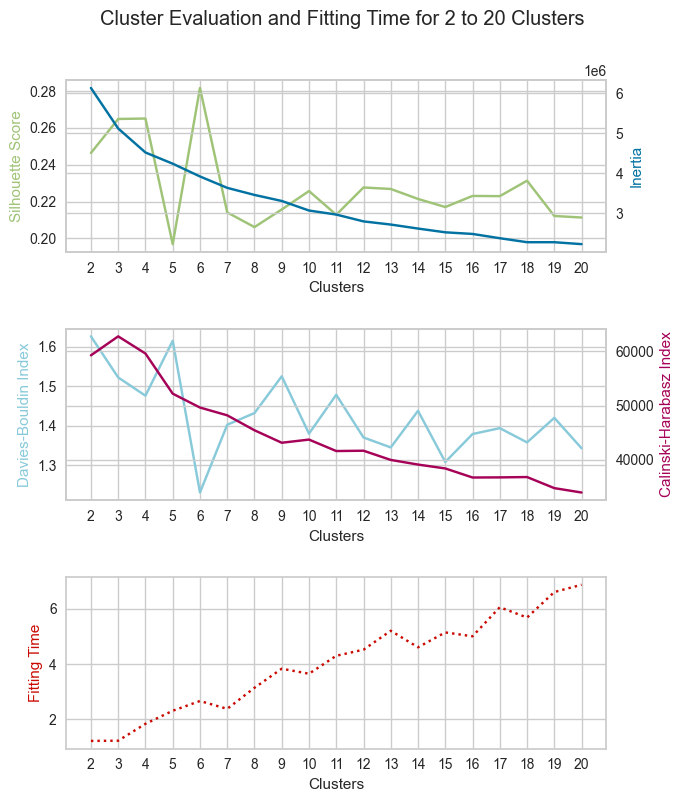

In [18]:
viz.plot_silhouette(X, kmeans=KMeans(init="k-means++", random_state=RANDOM_STATE), k_start = 2, k_end = 20)

## Silhouette Plots

For n_clusters = 5 The average silhouette_score is : 0.1971832495544207
For n_clusters = 6 The average silhouette_score is : 0.21497187112862415
For n_clusters = 7 The average silhouette_score is : 0.219647224769769
For n_clusters = 8 The average silhouette_score is : 0.21798378111533562
For n_clusters = 9 The average silhouette_score is : 0.2202430609819215
For n_clusters = 10 The average silhouette_score is : 0.21829629322810834
For n_clusters = 11 The average silhouette_score is : 0.23050053280391058


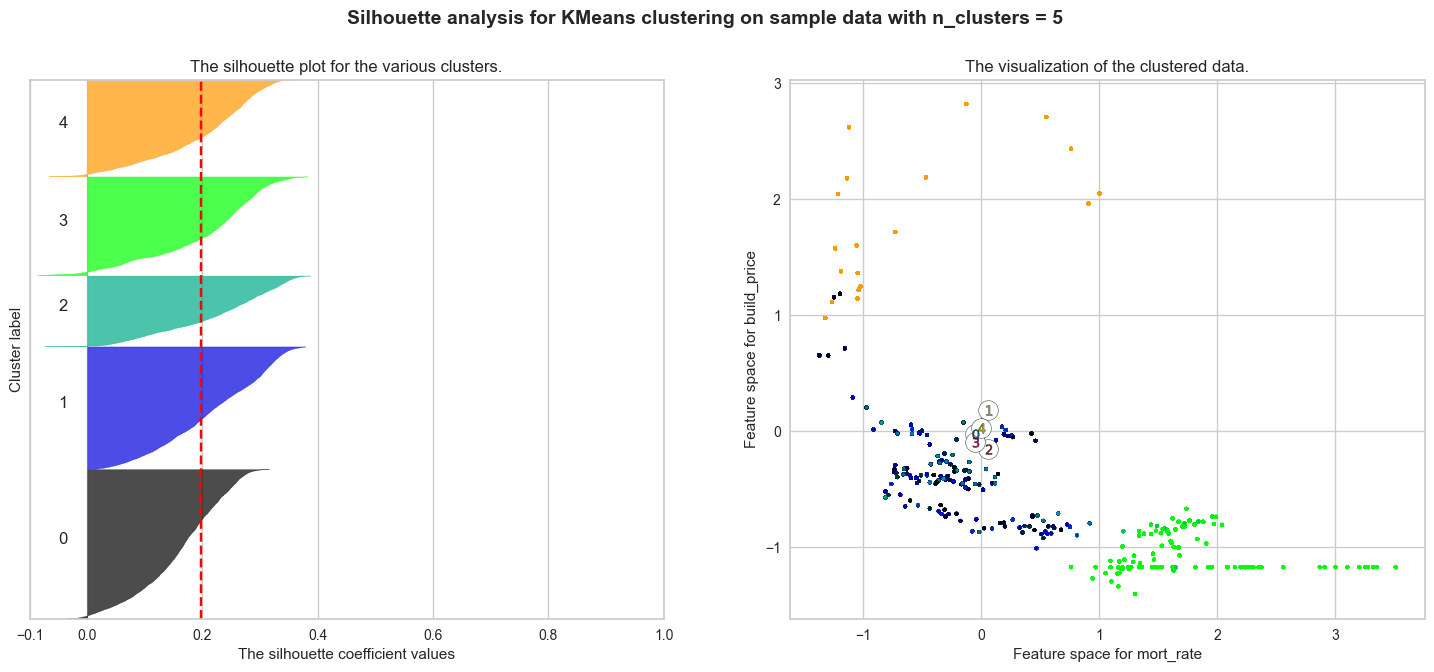

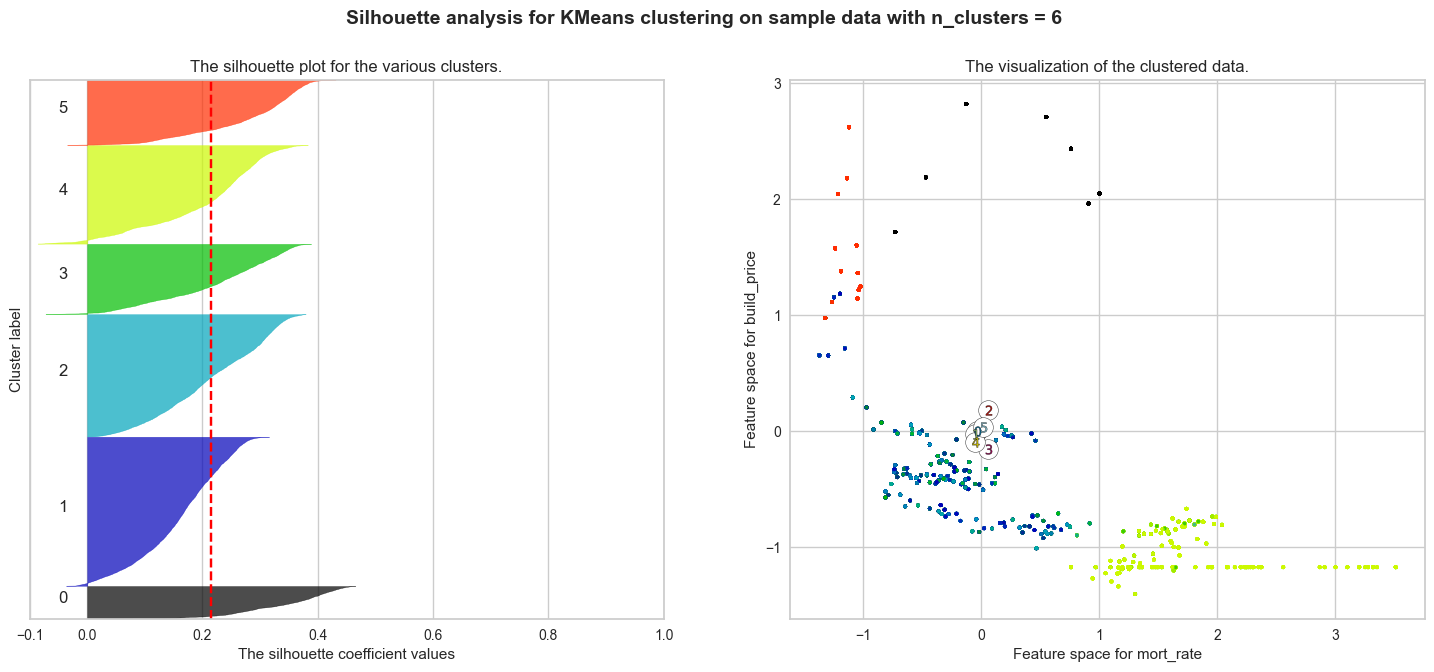

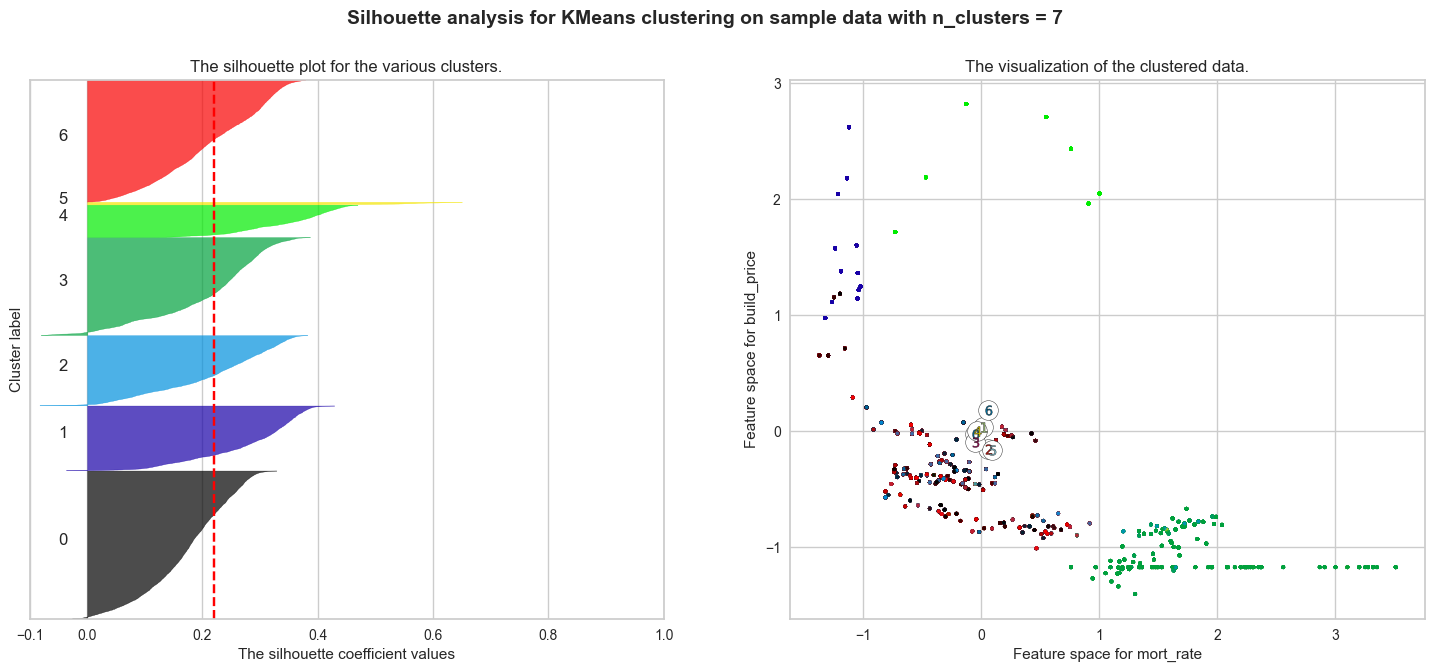

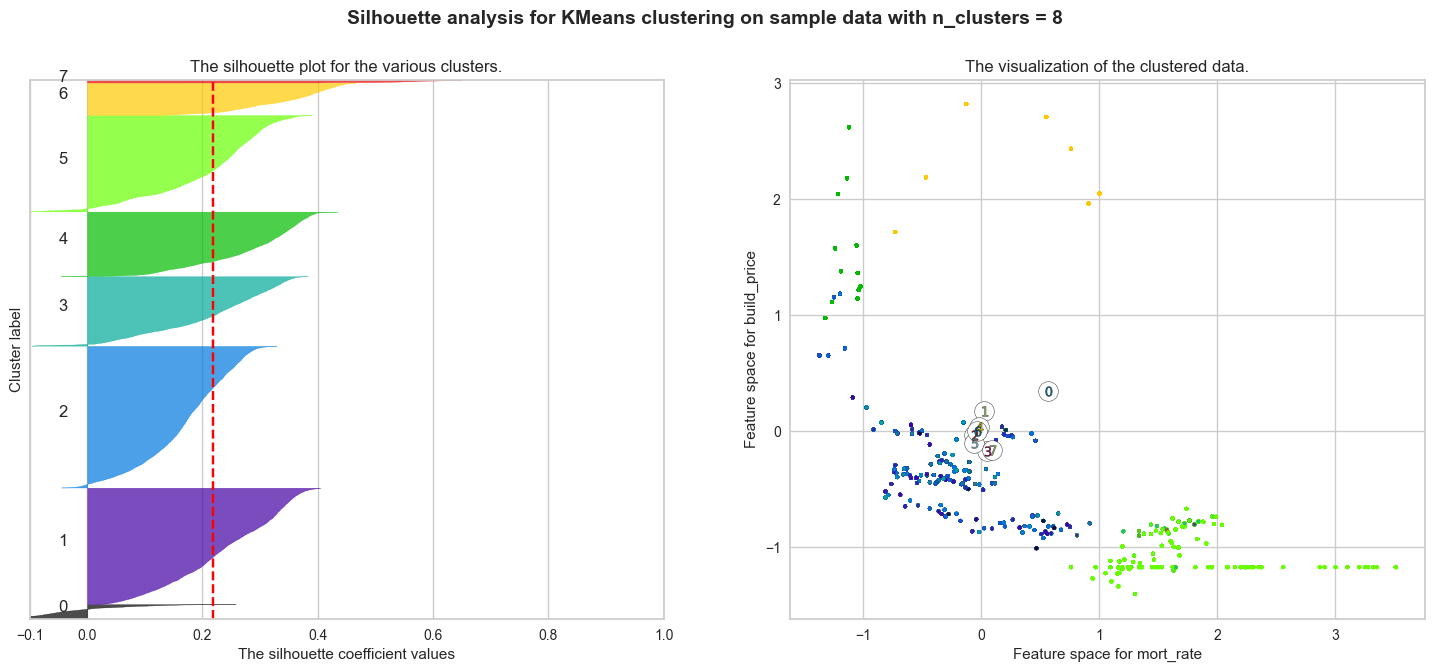

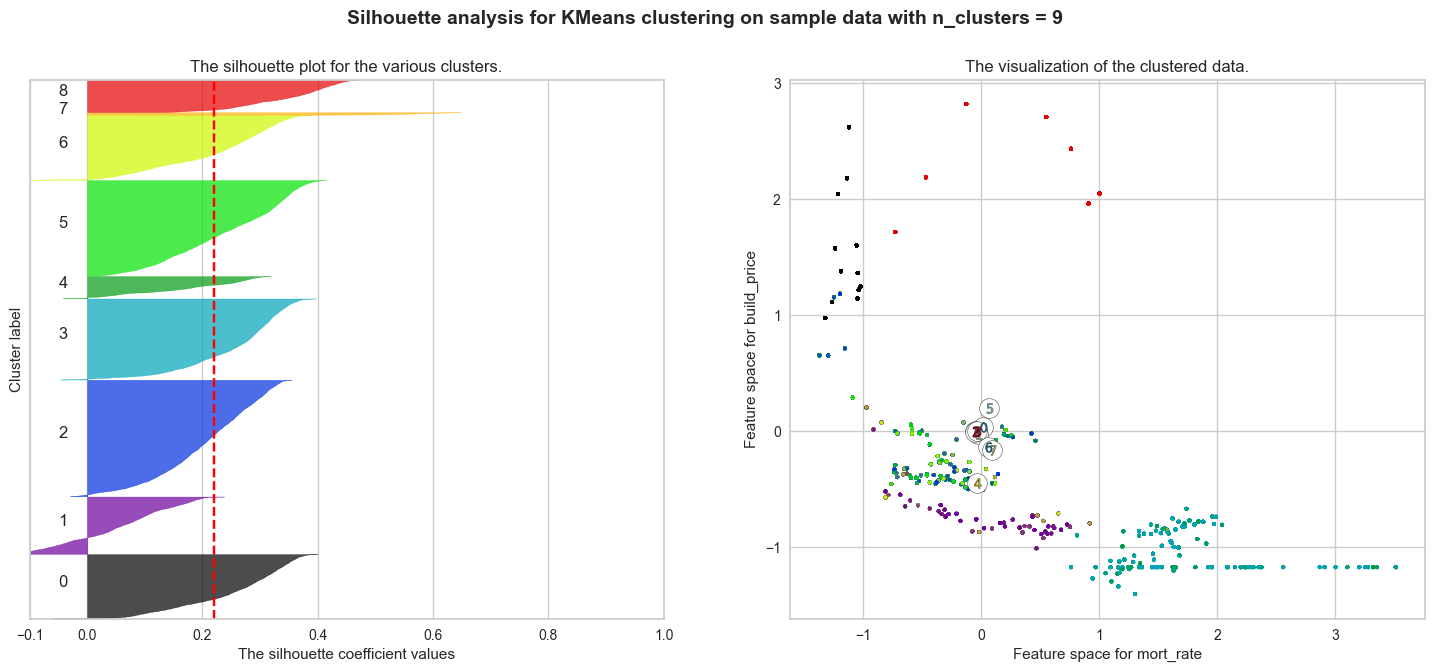

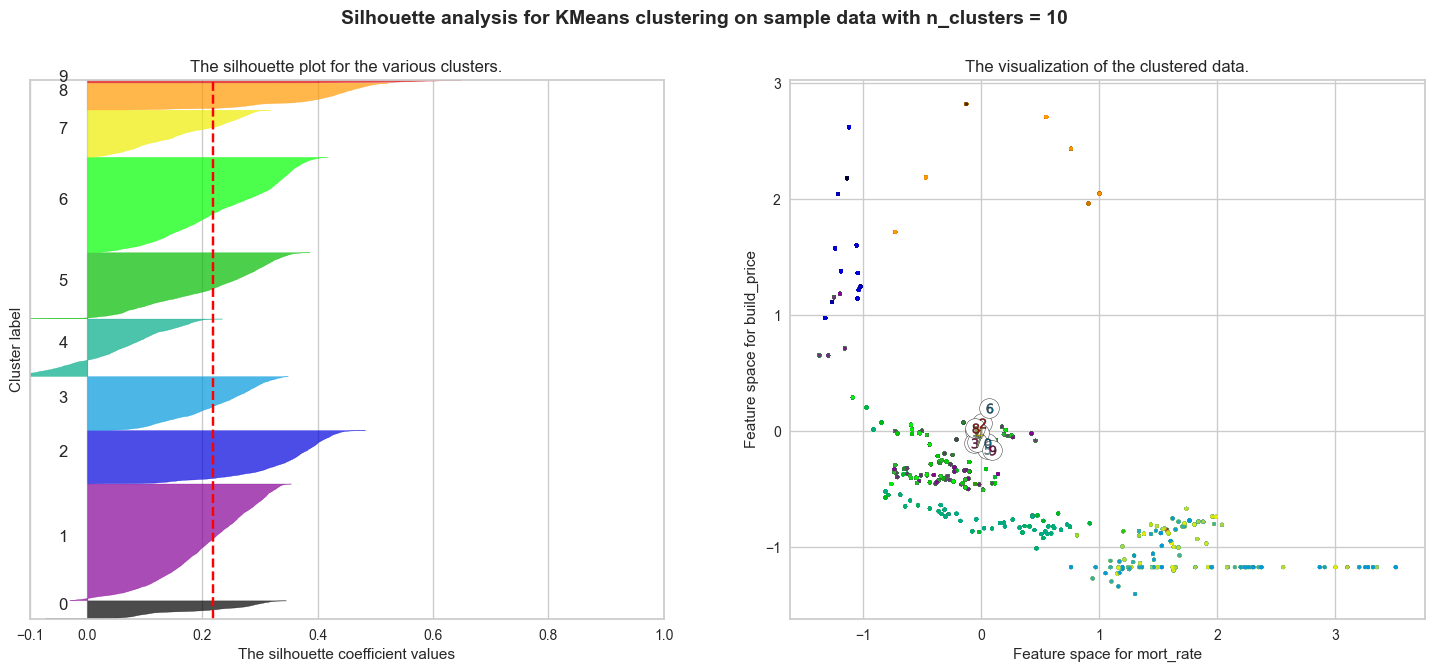

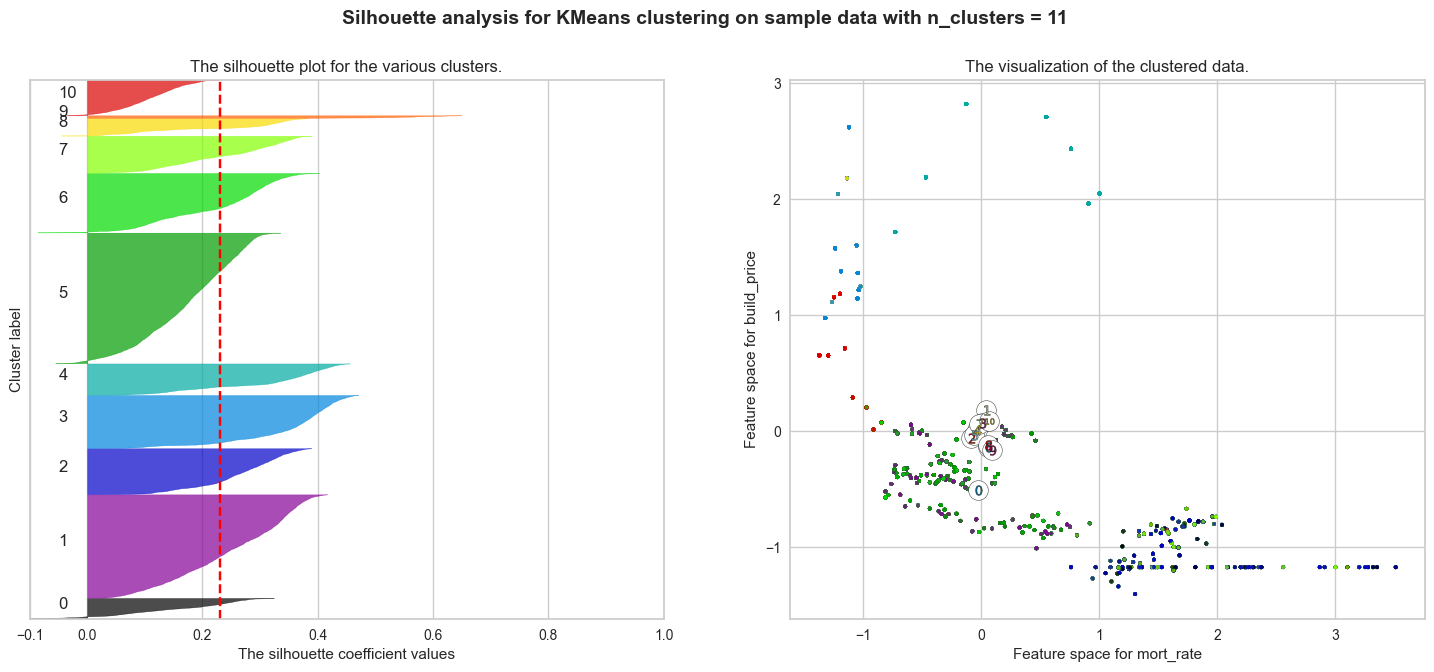

In [17]:
range_n_clusters = [5 , 6, 7, 8, 9, 10, 11]
ax = 'mort_rate'
ay = 'build_price'

viz.draw_silhouette(X, k=range_n_clusters, ax=ax, ay=ay, random_state=RANDOM_STATE)